In [31]:
# --- Imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_recall_curve
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [3]:
# --- Load Data ---
data = pd.read_csv('sept2013c3.csv')
X = data.drop(columns=['Class'])
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
# Create a sequential model
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dense(64, activation='relu'),
    Dropout(.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
    ])

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
    )

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.5, 
    patience=2, 
    min_lr=1e-6
    )

# Training
history = model.fit(
    X_train, 
    y_train, 
    epochs=30, batch_size=32, 
    validation_split=0.2, 
    verbose=1, 
    callbacks=[reduce_lr]
    )

Epoch 1/30


c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5697/5697 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9810 - loss: 0.1197 - val_accuracy: 0.9993 - val_loss: 0.0064 - learning_rate: 1.0000e-04
Epoch 2/30
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9992 - loss: 0.0084 - val_accuracy: 0.9993 - val_loss: 0.0041 - learning_rate: 1.0000e-04
Epoch 3/30
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9994 - loss: 0.0050 - val_accuracy: 0.9993 - val_loss: 0.0040 - learning_rate: 1.0000e-04
Epoch 4/30
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9993 - loss: 0.0049 - val_accuracy: 0.9994 - val_loss: 0.0037 - learning_rate: 1.0000e-04
Epoch 5/30
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9993 - loss: 0.0048 - val_accuracy: 0.9994 - val_loss: 0.0037 - learning_rate: 1.0000e-04
Epoch 6/30
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9993 - loss: 0.0049 - val_accuracy: 0.9994 - val_loss: 0.0033 - learning_rate: 1.0000e-04
Epoch 7/30
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accurac

In [34]:
y_pred = model.predict(X_test)

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-9)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold: {optimal_threshold:.2f}")

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 713us/step
Optimal Threshold: 0.58


In [35]:
# Evaluate the Model
thresholds = [ .1, .2, .3, 0.4, 0.5, 0.6, .7]
for threshold in thresholds:
    print(f"\n-------- Threshold: {threshold} --------")
    y_pred_adjusted = (y_pred > threshold).astype(int)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred_adjusted))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_adjusted, target_names=['Class 0', 'Class 1']))
    print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred)}")


-------- Threshold: 0.1 --------
Confusion Matrix:
[[56837    27]
 [   14    84]]

Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00     56864
     Class 1       0.76      0.86      0.80        98

    accuracy                           1.00     56962
   macro avg       0.88      0.93      0.90     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC Score: 0.9853079456318261

-------- Threshold: 0.2 --------
Confusion Matrix:
[[56843    21]
 [   17    81]]

Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00     56864
     Class 1       0.79      0.83      0.81        98

    accuracy                           1.00     56962
   macro avg       0.90      0.91      0.90     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC Score: 0.9853079456318261

-------- Threshold: 0.3 --------
Confusion Matrix:
[[56849    1

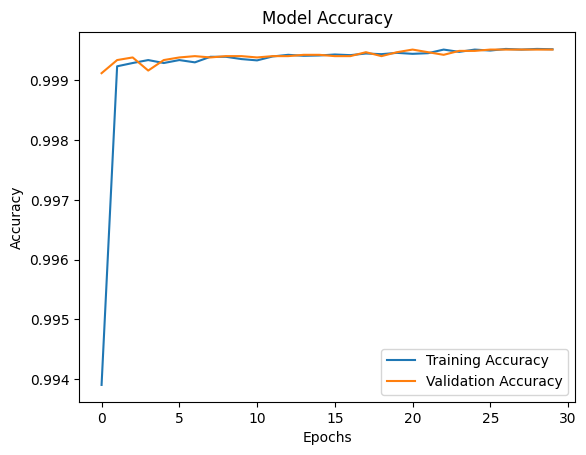

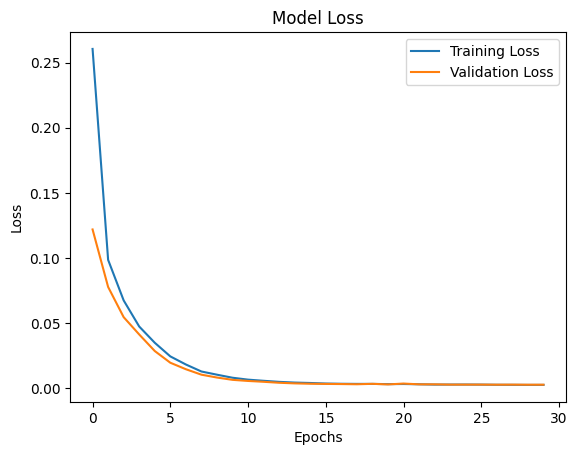

In [15]:
# Plot
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()